<a href="https://colab.research.google.com/github/AIFOREVERYBOD/AI-FOR-ALL/blob/main/%D0%9F%D1%80%D0%B8%D0%BC%D0%B5%D1%80%20%D1%83%D1%87%D0%B5%D0%B1%D0%BD%D0%BE%D0%B9%20%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D1%81%D0%B5%D1%82%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
train, _ = tfds.load('cats_vs_dogs', split=['train[:100%]'], with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incomplete35X5OQ/cats_vs_dogs-train.tfrecord*...:   0%|…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


In [ ]:
SIZE = 224
def resize_image(img, label):
  img = tf.cast(img, tf.float32)
  img = tf.image.resize(img, (SIZE, SIZE))
  img = img / 255.0
  return img, label

In [ ]:
train_resized = train[0].map(resize_image)
train_batches = train_resized.shuffle(1000).batch(16)

In [ ]:
base_layers = tf.keras.applications.MobileNetV2(input_shape=(SIZE, SIZE, 3), include_top=False)
base_layers.trainable = False

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
model = tf.keras.Sequential([
                             base_layers,
                             GlobalAveragePooling2D(),
                             Dropout(0.2),
                             Dense(1)
])
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
model.fit(train_batches, epochs=1)

1454/1454 [==============================] - 922s 630ms/step - loss: 0.0679 - accuracy: 0.9735


In [ ]:
model.fit(train_batches, epochs=2)

Epoch 1/2
1454/1454 [==============================] - 921s 632ms/step - loss: 0.0459 - accuracy: 0.9838
Epoch 2/2
1454/1454 [==============================] - 918s 630ms/step - loss: 0.0423 - accuracy: 0.9850


In [ ]:
files.upload()

Saving 1.jpg to 1 (3).jpg
Saving 2.jpg to 2 (2).jpg
Saving 3.jpg to 3 (2).jpg
Saving 4.jpg to 4 (2).jpg
Saving 5.jpg to 5 (2).jpg
Saving 6.jpg to 6 (2).jpg
Saving 7.jpg to 7 (2).jpg
Saving 8.jpg to 8 (2).jpg
Saving 9.jpg to 9 (2).jpg
Saving 10.jpg to 10 (2).jpg
Saving 11.jpg to 11 (2).jpg
Saving 12.jpg to 12 (2).jpg
Saving 13.jpg to 13.jpg
Saving 14.jpg to 14 (2).jpg
Saving 15.jpg to 15.jpg
Saving 16.jpg to 16.jpg


1/1 [==============================] - 0s 174ms/step


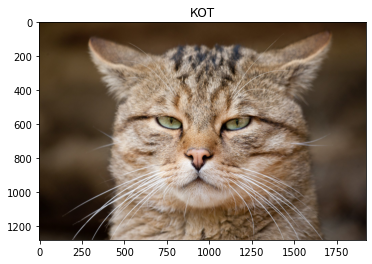

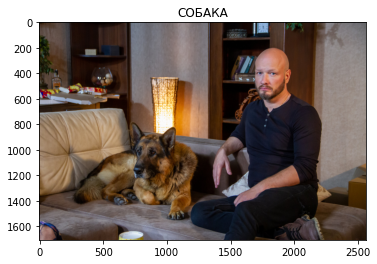

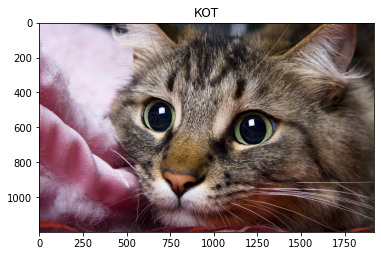

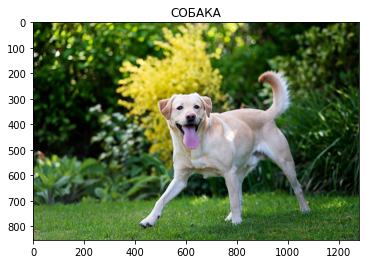

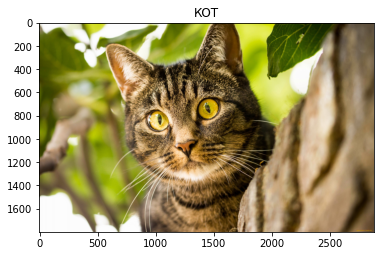

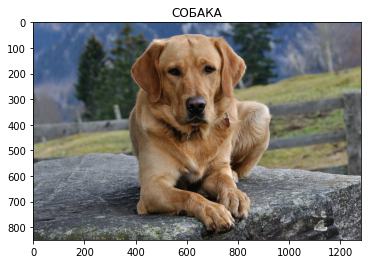

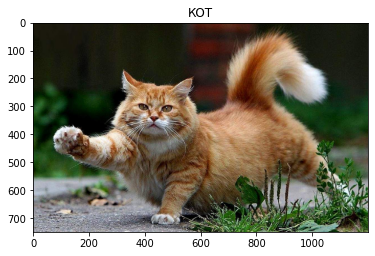

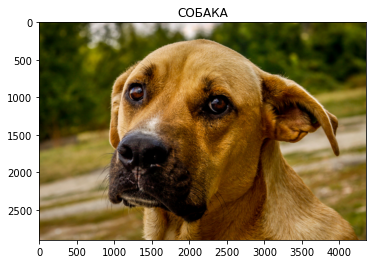

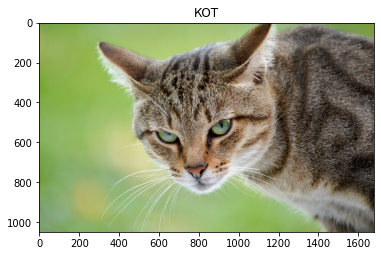

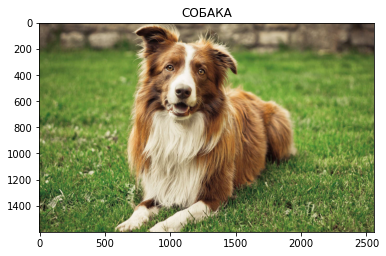

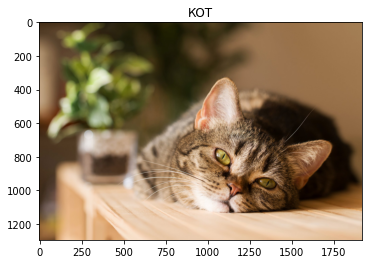

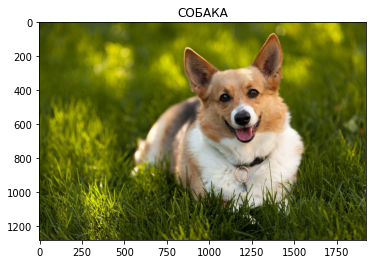

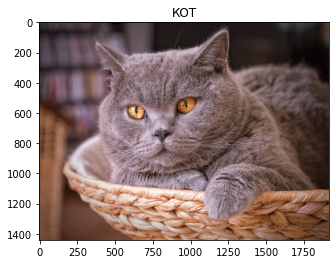

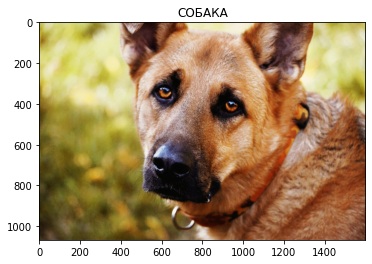

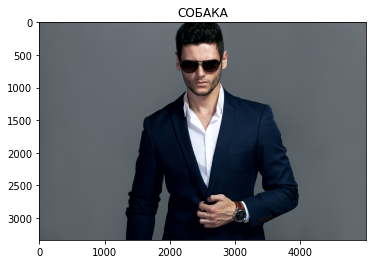

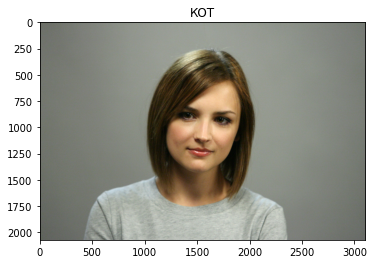

In [ ]:
for i in range(16):
  img = load_img(f'{i+1}.jpg')
  img_array = img_to_array(img)
  img_resized, _ = resize_image(img_array, _)
  img_expended = np.expand_dims(img_resized, axis=0)
  prediction = model.predict(img_expended)[0][0]
  pred_label = 'КОТ' if prediction < 0.5 else 'СОБАКА'
  plt.figure()
  plt.imshow(img)
  plt.title(f'{pred_label}')